# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to underline text in plots
from matplotlib import rc

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
%run get_data.ipynb
print("All data is ready!")

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!
All data is ready!


## Control
Set variables to "True" to trigger the action described by the comment and the variable's name.

In [3]:
get_likeliest_shift_of_all_counties_correlations = True
get_sum_of_all_counties_correlations = True # overwrites the above

## Function to calculate the probability of correlations between two arrays

In [4]:
%run get_scaled_correlation.ipynb

In [5]:
def sort_AdmUnitIDs_by_population_density(AdmUnitIds):
    county_by_population_density = dict()
    for AdmUnitID, county in counties_geography.items():
        if county['population_density'] in county_by_population_density.keys():
            raise Exception("The population density " + str(county['population_density']) +
                            "seems to be relate to two counties")
        else:
            county_by_population_density[county['population_density']] = AdmUnitID
    pop_densitys = list(county_by_population_density.keys())
    pop_densitys.sort()
    AdmUnitIds = list()
    for e in pop_densitys:
        AdmUnitIds.append(county_by_population_density[e])

In [6]:
AdmUnitIds = list(covid19.keys())
sort_AdmUnitIDs_by_population_density(AdmUnitIds)

In [7]:
correlation_matrix = [[0 for c2 in range(len(AdmUnitIds))] for c1 in range(len(AdmUnitIds))]
for AdmUnitId1 in AdmUnitIds:
    for AdmUnitId2 in AdmUnitIds:
        if AdmUnitId1 == AdmUnitId2: continue
        if correlation_matrix[AdmUnitIds.index(AdmUnitId1)][AdmUnitIds.index(AdmUnitId2)] != 0: continue
        if get_likeliest_shift_of_all_counties_correlations:
            offset = get_scaled_correlation(covid19[AdmUnitId1]['incidences'],
                                            covid19[AdmUnitId2]['incidences'])[3]
        
        if get_sum_of_all_counties_correlations:
            correlation = get_scaled_correlation(covid19[AdmUnitId1]['incidences'],
                                                 covid19[AdmUnitId2]['incidences'])[0]
            offset = sum(correlation[:len(correlation)//2]) - sum(correlation[len(correlation)//2 + 1:])

        correlation_matrix[AdmUnitIds.index(AdmUnitId1)][AdmUnitIds.index(AdmUnitId2)]=offset
        correlation_matrix[AdmUnitIds.index(AdmUnitId2)][AdmUnitIds.index(AdmUnitId1)]=-offset

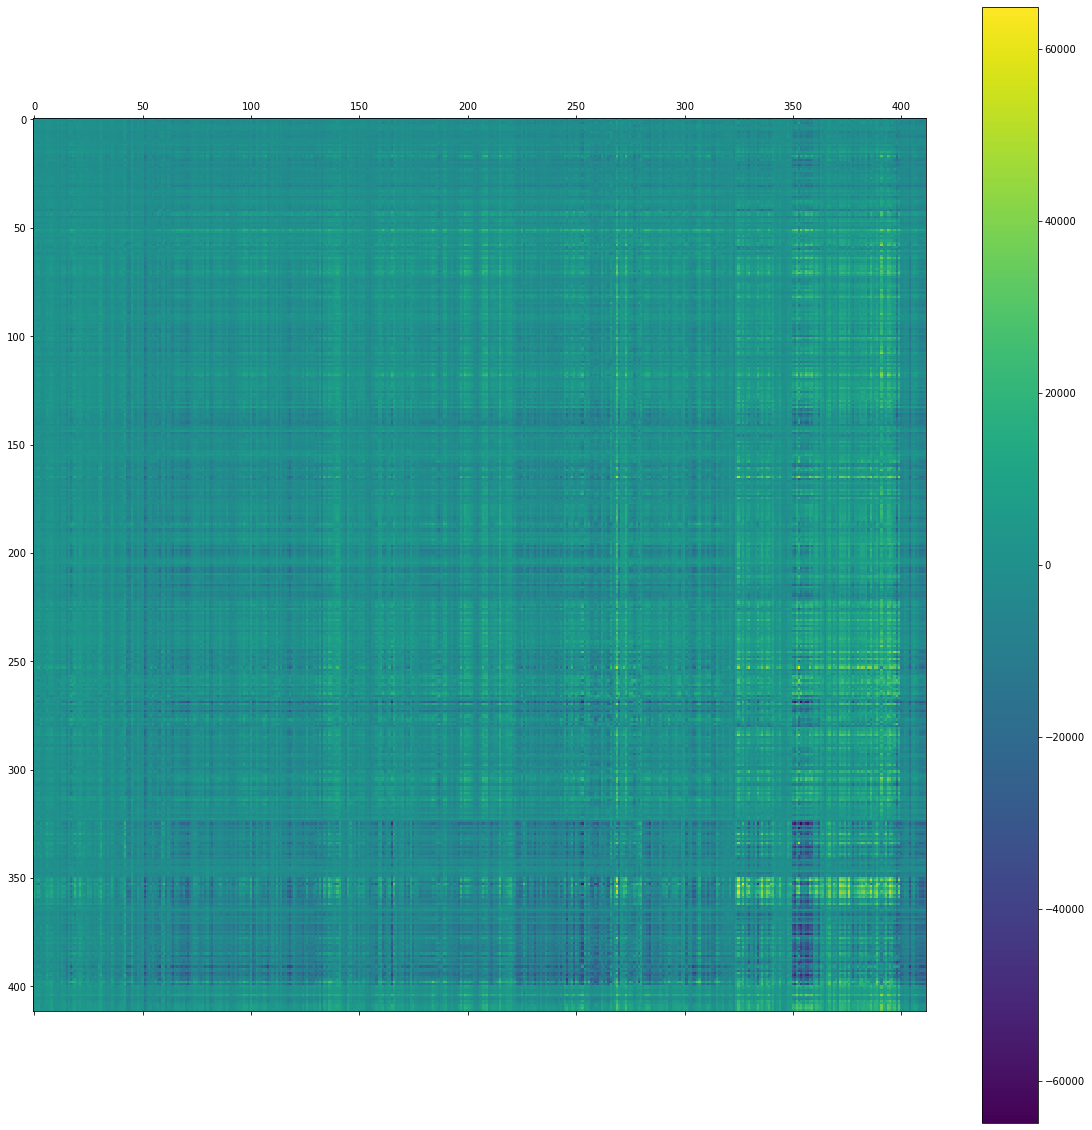

In [8]:
matfig = plt.figure(figsize=(20,20))
plt.matshow(correlation_matrix, fignum=matfig.number)
plt.colorbar()

In [9]:
average_correlation = dict()
for row_index in range(len(correlation_matrix)):
    row = correlation_matrix[row_index]
    AdmUnitID = AdmUnitIds[row_index]
    average_correlation[AdmUnitID]=(sum(row)/len(row))

-13891.30097087378612339.728155339806


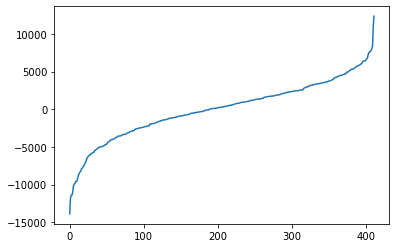

In [10]:
average_correlation_copy = list(average_correlation.values())[:]
average_correlation_copy.sort()
print(str(average_correlation_copy[0]) + str(average_correlation_copy[-1]))
plt.plot(average_correlation_copy)

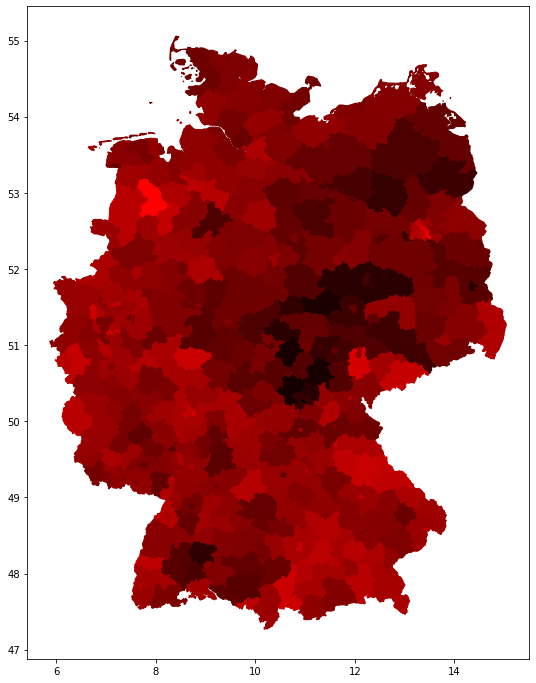

In [11]:
plt.figure(figsize=(9, 12))    # enlarge plot
for AdmUnitID, correlation in average_correlation.items():
    color = ((correlation - average_correlation_copy[0])/
             (average_correlation_copy[-1]-average_correlation_copy[0]), 0, 0)
    for polygon in counties_geography[AdmUnitID]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color)
plt.show()

66805.59370409738


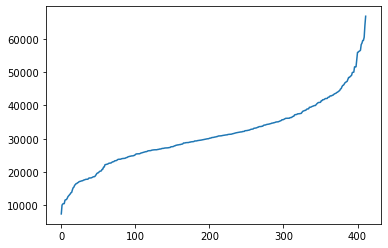

In [12]:
incidences_of_counties_acc = list()
for county in covid19.values():
    incidences_of_counties_acc.append(sum(county["incidences"]))
incidences_of_counties_acc.sort()
print(incidences_of_counties_acc[-1])
plt.plot(incidences_of_counties_acc)

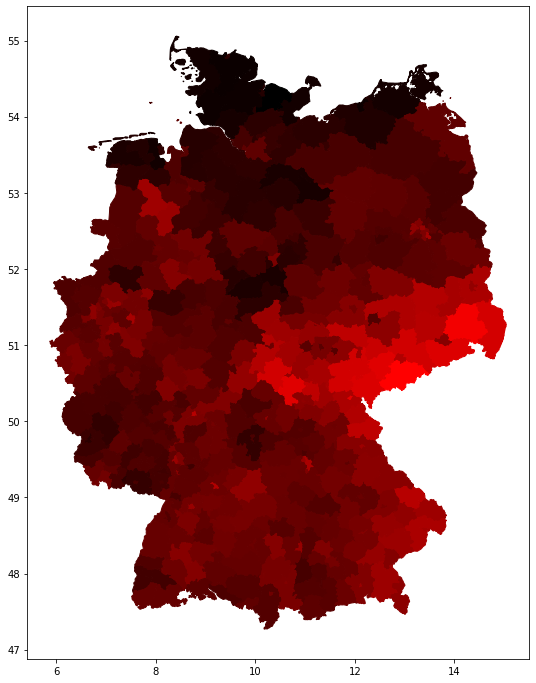

In [13]:
plt.figure(figsize=(9, 12))    # enlarge plot
for AdmUnitID, county in covid19.items():
    color = ((sum(county["incidences"]) - incidences_of_counties_acc[0])/
             (incidences_of_counties_acc[-1] - incidences_of_counties_acc[0]), 0, 0)
    for polygon in counties_geography[AdmUnitID]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color)
plt.show()